In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import h2o

h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 . connected.


H2O_cluster_uptime:,5 hours 19 mins
H2O_cluster_timezone:,Asia/Kolkata
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.30.0.1
H2O_cluster_version_age:,29 days
H2O_cluster_name:,H2O_from_python_Aditya_Jain_073e87
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,139.9 Mb
H2O_cluster_total_cores:,4
H2O_cluster_allowed_cores:,4
H2O_cluster_status:,"locked, 1 nodes are not healthy"


In [3]:
data = h2o.import_file('allyears2k_headers.csv',
                      destination_frame='airlines')

train, valid, test = data.split_frame([0.8,0.1], seed=100)
print ('Number of rows train (%d), validation (%d) and test (%d)'%(train.nrows, valid.nrows, test.nrows))

Parse progress: |█████████████████████████████████████████████████████████| 100%
Number of rows train (35257), validation (4270) and test (4451)


In [4]:
data.names

['Year',
 'Month',
 'DayofMonth',
 'DayOfWeek',
 'DepTime',
 'CRSDepTime',
 'ArrTime',
 'CRSArrTime',
 'UniqueCarrier',
 'FlightNum',
 'TailNum',
 'ActualElapsedTime',
 'CRSElapsedTime',
 'AirTime',
 'ArrDelay',
 'DepDelay',
 'Origin',
 'Dest',
 'Distance',
 'TaxiIn',
 'TaxiOut',
 'Cancelled',
 'CancellationCode',
 'Diverted',
 'CarrierDelay',
 'WeatherDelay',
 'NASDelay',
 'SecurityDelay',
 'LateAircraftDelay',
 'IsArrDelayed',
 'IsDepDelayed']

In [5]:
data.summary()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,IsArrDelayed,IsDepDelayed
type,int,int,int,int,int,int,int,int,enum,int,enum,int,int,int,int,int,enum,enum,int,int,int,int,enum,int,int,int,int,int,int,enum,enum
mins,1987.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,,1.0,,16.0,17.0,14.0,-63.0,-16.0,,,11.0,0.0,0.0,0.0,,0.0,0.0,0.0,0.0,0.0,0.0,,
mean,1997.5,1.4090909090909094,14.601073263904684,3.820614852880986,1345.8466613820758,1313.2228614307157,1504.6341303788895,1485.2891673109277,,818.8429896766567,,124.81452913540424,125.02156260661894,114.3161110907826,9.31711193698432,10.007390655600114,,,730.1821905650504,5.381368059530624,14.16863418473206,0.024694165264450407,,0.0024785119832643593,4.047800291055633,0.2893764692712415,4.855031904175528,0.017015560282100085,7.620060450016787,,
maxs,2008.0,10.0,31.0,7.0,2400.0,2359.0,2400.0,2359.0,,3949.0,,475.0,437.0,402.0,475.0,473.0,,,3365.0,128.0,254.0,1.0,,1.0,369.0,201.0,323.0,14.0,373.0,,
sigma,6.3443609017107025,1.8747113713439636,9.17579042586145,1.905013119132896,465.3408991242338,476.2511399925997,484.347487903516,492.7504341227009,,777.4043691636348,,73.9744416605902,73.4015946300093,69.63632951506105,29.840221962414834,26.438809042916446,,,578.4380082304242,4.201979939864827,9.905085747204334,0.15519314135784237,,0.049723487218862286,16.205729904484194,4.4167798987341245,18.619776221475686,0.4039401821015118,23.487565874106213,,
zeros,0,0,0,0,0,569,0,569,,0,,0,0,0,1514,6393,,,0,623,557,42892,,43869,7344,8840,7388,8914,7140,,
missing,0,0,0,0,1086,0,1195,0,0,0,32,1195,13,16649,1195,1086,0,0,35,16026,16024,0,9774,0,35045,35045,35045,35045,35045,0,0
0,1987.0,10.0,14.0,3.0,741.0,730.0,912.0,849.0,PS,1451.0,NA,91.0,79.0,nan,23.0,11.0,SAN,SFO,447.0,nan,nan,0.0,NA,0.0,nan,nan,nan,nan,nan,YES,YES
1,1987.0,10.0,15.0,4.0,729.0,730.0,903.0,849.0,PS,1451.0,NA,94.0,79.0,nan,14.0,-1.0,SAN,SFO,447.0,nan,nan,0.0,NA,0.0,nan,nan,nan,nan,nan,YES,NO
2,1987.0,10.0,17.0,6.0,741.0,730.0,918.0,849.0,PS,1451.0,NA,97.0,79.0,nan,29.0,11.0,SAN,SFO,447.0,nan,nan,0.0,NA,0.0,nan,nan,nan,nan,nan,YES,YES


In [6]:
#what we want to predict
y = 'ArrDelay'

#fields which we may not have while doing prediction.
ignoreFields = ["IsArrDelay",
               "TailNum",
               "ArrTime",
               "ActualElapsedTime"]

#all fields minus those which we would not have during predictions
xAll = [i for i in train.names if i not in ignoreFields]

### Model 1 -> GBM Model

In [7]:
from h2o.estimators.gbm import H2OGradientBoostingEstimator

gbm_model = H2OGradientBoostingEstimator(model_id='arr_delay_gbm') 
gbm_model.train(xAll,y,train, validation_frame=valid)

gbm Model Build progress: |███████████████████████████████████████████████| 100%


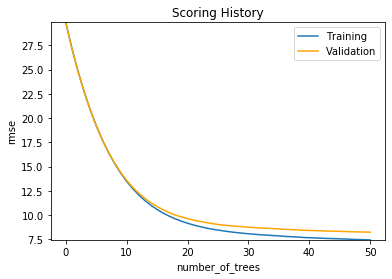

In [8]:
gbm_model.plot()

In [9]:
gbm_model.model_performance(test)


ModelMetricsRegression: gbm
** Reported on test data. **

MSE: 65.49830659052326
RMSE: 8.093102408256259
MAE: 5.529369330639957
RMSLE: NaN
Mean Residual Deviance: 65.49830659052326


### Model 2 -> Deep Learning Model

 - We see that when we change the distribution to 'laplace' the value of mae drops.
 - this is partly because the target variable has a long tail - decays expotentially

In [10]:
from h2o.estimators.deeplearning import H2ODeepLearningEstimator

del_model = H2ODeepLearningEstimator(model_id='arr_delay_dl',
                                    stopping_rounds=3,
                                    stopping_tolerance=0,
                                    stopping_metric='deviance',
                                    distribution='laplace') 
del_model.train(xAll,y,train, validation_frame=valid)

deeplearning Model Build progress: |██████████████████████████████████████| 100%


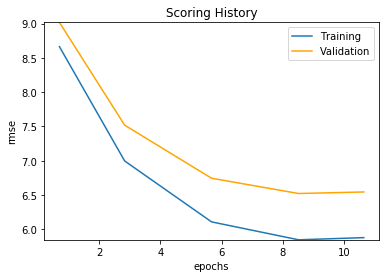

In [11]:
del_model.plot()

In [12]:
del_model.model_performance(test)


ModelMetricsRegression: deeplearning
** Reported on test data. **

MSE: 39.41336498164239
RMSE: 6.278006449633704
MAE: 3.164840250333446
RMSLE: NaN
Mean Residual Deviance: 3.164840250333446


### Model 3 - RandomForest

In [13]:
from h2o.estimators.random_forest import H2ORandomForestEstimator

rf_model = H2ORandomForestEstimator(model_id='arr_delay_rf')
rf_model.train(xAll,y,train, validation_frame=valid)

drf Model Build progress: |███████████████████████████████████████████████| 100%


### Model 3 - Stacked Ensemble

In [14]:
from h2o.estimators.stackedensemble import H2OStackedEnsembleEstimator

ind_models = [gbm_model.model_id, del_model.model_id, rf_model.model_id]

stacked_model = H2OStackedEnsembleEstimator(model_id='arr_delay_ensemble', base_models=ind_models)
stacked_model.train(xAll, y, train, valid)

stackedensemble Model Build progress: |███████████████████████████████████| 100%


### Analysing Performance

In [15]:
import pandas as pd
import numpy as np

model_names = ['GBM', 'Deep Learning', 'Random Forest','Ensemble']
all_models = [gbm_model, del_model, rf_model, stacked_model]

test_performances = list(map(lambda x: x.model_performance(test), all_models))

In [16]:
# looking mae
pd.Series(map((lambda x: x.mae()), test_performances), model_names)

GBM              5.529369
Deep Learning    3.164840
Random Forest    4.974727
Ensemble         2.995046
dtype: float64

In [17]:
# looking rmse
pd.Series(map((lambda x: x.rmse()), test_performances), model_names)

GBM              8.093102
Deep Learning    6.278006
Random Forest    7.636327
Ensemble         5.880462
dtype: float64

In [18]:
# looking mse
pd.Series(map((lambda x: x.mse()), test_performances), model_names)

GBM              65.498307
Deep Learning    39.413365
Random Forest    58.313484
Ensemble         34.579836
dtype: float64